In [1]:
# imports
import re
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.patches import ConnectionPatch

In [2]:
# read data from csv files
all_training_data = pd.read_csv('./data/train.csv', index_col=0)
all_vocab_words = pd.read_csv('./data/unigram_freq.csv', index_col=0)

In [3]:
all_essays = []
all_scores = []

for ind, data in enumerate(all_training_data.iterrows()):
    text, cohes, syntax, vocab, phrase, gram, convs = data[1]
    all_essays.append(text)
    all_scores.append(vocab) 

In [4]:
np_all_essays = np.array(all_essays)

In [5]:
# building dictionary with vocab word as key and count as value
vocab_dict = {}

for data in all_vocab_words.iterrows():
  vocab_dict[data[0]] = data[1][0]

In [6]:
cleaned_essays = []
misspelled_perc = []

for index, essay in enumerate(np_all_essays):
  essay_wo_punc = re.sub(r'[^\w\s]', '', essay)
  essay_lower = essay_wo_punc.lower()
  split_essay = re.split('[^a-zA-Z]+', essay_lower)
  cleaned_essays.append(split_essay)

  misspell_count = 0
  for word in split_essay:
    if word not in vocab_dict and word != '':
      misspell_count += 1
  misspelled_perc.append(misspell_count / len(split_essay))

In [7]:
num_essays_per_score = {}
sum_perc_per_score = {}

for index in range(len(all_scores)):
  if all_scores[index] not in num_essays_per_score:
    num_essays_per_score[all_scores[index]] = 0
    sum_perc_per_score[all_scores[index]] = 0
  
  num_essays_per_score[all_scores[index]] += 1
  sum_perc_per_score[all_scores[index]] += misspelled_perc[index]
  if all_scores[index] == 1.5:
    print(sum_perc_per_score[1.5])

scores = []
avg_perc_per_score = []

for sc in sum_perc_per_score:
  scores.append(sc)
  avg = sum_perc_per_score[sc] / num_essays_per_score[sc]
  avg_perc_per_score.append(avg)

0.03431372549019608
0.13907563025210085
0.16907563025210084
0.1784653016136032
0.20840542137408224
0.3435405565092174
0.35591169052983596
0.4104571450752905
0.42564701849301206
0.4559500487960424
0.5241853429136895
0.6276336187757584
0.6276336187757584
0.6604205040216601


Text(0, 0.5, 'Percentage of missing words')

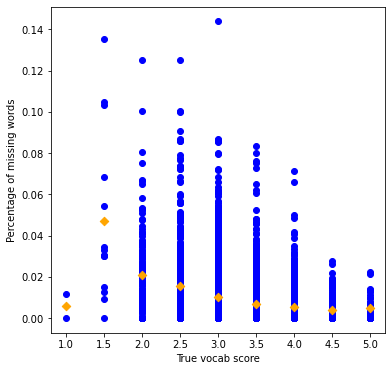

In [8]:
# plotting missing words vs vocab scores

fig,ax = plt.subplots(figsize=(6, 6))
ax.scatter(all_scores, misspelled_perc, color=['blue'])
ax.scatter(scores, avg_perc_per_score, color=['orange'], marker='D')
ax.set_xlabel('True vocab score')
ax.set_ylabel('Percentage of missing words')

In [9]:
num_words = len(all_vocab_words)
top5k = num_words*0.01
top50k = num_words*0.5

top5k_words = set()
top50k_words = set()

index = 0
for data in all_vocab_words.iterrows():
    if index < top5k:
        top5k_words.add(data[0])
    elif index < top50k:
        top50k_words.add(data[0])
    else:
        break
    index += 1

In [10]:
top5k_count = 0
top50k_count = 0
other = 0

for essay in cleaned_essays:
  for word in essay:
    if word in top5k_words:
      top5k_count += 1
    elif word in top50k_words:
      top50k_count += 1
    else:
      other += 1

total = top5k_count + top50k_count + other
bottom = top50k_count + other

# basic pie chart parametrs
pie1_labels = ['Top 5k', 'Top 50k', '']
pie1_percs = [top5k_count/total, top50k_count/total, other/total]

# advanced pie chart parameters
pie2_labels = ['Other', 'Top 1%']
pie2_percs = [1 - (top5k_count/total), top5k_count/total]

# bar chart parameters
other_percs = [top50k_count/bottom, other/bottom]
other_labels = ['Top 50k', '']

(-1.10737291484055, 1.106897104401609, -1.1060052051573084, 1.100285962150348)

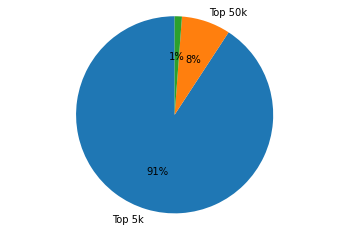

In [13]:
fig2, ax2 = plt.subplots()
ax2.pie(pie1_percs, labels=pie1_labels, autopct='%1.0f%%', startangle=90)
ax2.axis('equal')

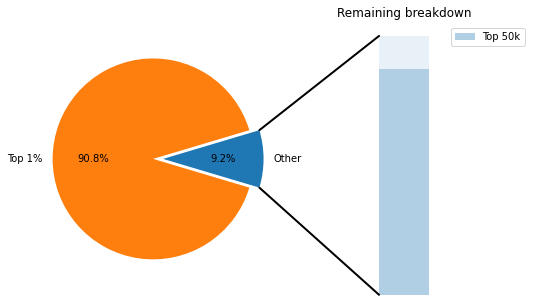

In [14]:
# based on code found at https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
explode = [0.1, 0]

# rotate so that first wedge is split by the x-axis
angle = -180 * pie2_percs[0]
wedges, *_ = ax1.pie(pie2_percs, autopct='%1.1f%%', startangle=angle,
                     labels=pie2_labels, explode=explode)

# bar chart parameters
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(other_percs, other_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    #ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center') #only works with matplotlib version >3.4

ax2.set_title('Remaining breakdown')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(other_percs)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)